In [6]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import pandas as pd


In [7]:
column_name = ['age', 'sex', 'cp', 'treshbps', 'chol', 
               'fbs',
               'restecg', 'thalach', 'exang', 'oldpeak', 
               'slope',
               'ca', 'thal', 'HeartDisease']
raw_data = pd.read_excel('./datasets/heart-disease.xlsx',
                         header=None, names=column_name)
print(raw_data.head(20))

    age  sex  cp  treshbps chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0    63    1   1       145  233    1        2      150      0      2.3      3   
1    67    1   4       160  286    0        0      108      1      1.5      2   
2    67    1   4       120    ?    0        2      129      1      2.6      2   
3    37    1   3       130  250    0        0      187      0      3.5      3   
4    41    0   2       130  204    0        2      172      0      1.4      1   
5    56    1   2       120  236    0        0      178      0      0.8      1   
6    62    0   4       140  268    0        2      160      0      3.6      3   
7    57    0   4       120  354    0        0      163      1      0.6      1   
8    63    1   4       130  254    0        2      147      0      1.4      2   
9    53    1   4       140  203    1        2      155      1      3.1      3   
10   57    1   4       140  192    0        0      148      0      0.4      2   
11   56    0   2       140  

In [8]:
print(raw_data.describe().T)  #T  행렬전환해서 보여줌

              count        mean        std   min    25%    50%    75%    max
age           303.0   54.438944   9.038662  29.0   48.0   56.0   61.0   77.0
sex           303.0    0.679868   0.467299   0.0    0.0    1.0    1.0    1.0
cp            303.0    3.158416   0.960126   1.0    3.0    3.0    4.0    4.0
treshbps      303.0  131.689769  17.599748  94.0  120.0  130.0  140.0  200.0
fbs           303.0    0.148515   0.356198   0.0    0.0    0.0    0.0    1.0
restecg       303.0    0.983498   0.994883   0.0    0.0    0.0    2.0    2.0
thalach       303.0  149.607261  22.875003  71.0  133.5  153.0  166.0  202.0
exang         303.0    0.326733   0.469794   0.0    0.0    0.0    1.0    1.0
oldpeak       303.0    1.039604   1.161075   0.0    0.0    0.8    1.6    6.2
slope         303.0    1.600660   0.616226   1.0    1.0    2.0    2.0    3.0
HeartDisease  303.0    0.458746   0.499120   0.0    0.0    0.0    1.0    1.0


In [9]:
raw_data.info()   #none값은 없음
#다 숫자같아보이지만 object라는건 안에 ? 등의 문자가 포함되어있을 가능성이 매우 높음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    int64  
 1   sex           303 non-null    int64  
 2   cp            303 non-null    int64  
 3   treshbps      303 non-null    int64  
 4   chol          303 non-null    object 
 5   fbs           303 non-null    int64  
 6   restecg       303 non-null    int64  
 7   thalach       303 non-null    int64  
 8   exang         303 non-null    int64  
 9   oldpeak       303 non-null    float64
 10  slope         303 non-null    int64  
 11  ca            303 non-null    object 
 12  thal          303 non-null    object 
 13  HeartDisease  303 non-null    int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 33.3+ KB


In [10]:
clean_data = raw_data.replace("?",np.nan)   #np.nan 인 이유는....?
clean_data = clean_data.dropna() #그 행을 지움  7개의 행이 사라짐
clean_data.info()   # 그 뒤에 info를 확인해보면 object가 사라진게 보임

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 301
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           296 non-null    int64  
 1   sex           296 non-null    int64  
 2   cp            296 non-null    int64  
 3   treshbps      296 non-null    int64  
 4   chol          296 non-null    float64
 5   fbs           296 non-null    int64  
 6   restecg       296 non-null    int64  
 7   thalach       296 non-null    int64  
 8   exang         296 non-null    int64  
 9   oldpeak       296 non-null    float64
 10  slope         296 non-null    int64  
 11  ca            296 non-null    float64
 12  thal          296 non-null    float64
 13  HeartDisease  296 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 34.7 KB


In [11]:
#타겟은 HeartDisease로 입력은 나머지 13개 행 출력은 한 개 , 이진분류기가 됨

In [12]:
keep = column_name.pop()    #pop쓰면 뒤에 컬럼만 튀어나오고 그게 전체 컬럼네임에서 사라지게 됨.
print(keep)
print(column_name)

HeartDisease
['age', 'sex', 'cp', 'treshbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [13]:
training_data = clean_data[column_name]  #컬럼네임은 원래 리스트고
target = clean_data[[keep]]  #리스트로 감싸줘야 df로 출력됨

print(training_data)
print(target)

     age  sex  cp  treshbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145  233.0    1        2      150      0      2.3   
1     67    1   4       160  286.0    0        0      108      1      1.5   
3     37    1   3       130  250.0    0        0      187      0      3.5   
4     41    0   2       130  204.0    0        2      172      0      1.4   
5     56    1   2       120  236.0    0        0      178      0      0.8   
..   ...  ...  ..       ...    ...  ...      ...      ...    ...      ...   
297   57    0   4       140  241.0    0        0      123      1      0.2   
298   45    1   1       110  264.0    0        0      132      0      1.2   
299   68    1   4       144  193.0    1        0      141      0      3.4   
300   57    1   4       130  131.0    0        0      115      1      1.2   
301   57    0   2       130  236.0    0        2      174      0      0.0   

     slope   ca  thal  
0        3  0.0   6.0  
1        2  3.0   3.0  
3  

In [14]:
print(target.sum())   #df자체에 대한 sum() 열이 하나라 왜 하나 의문 들었지만 생각해보면 그 열만의 sum이 필요하니까
print("="*50)
print(target[keep].sum()) #이거처럼 인덱싱을 해줘야함. 

HeartDisease    136
dtype: int64
136


In [15]:
#어떤 자료가 더 중요한지 모르기때문에 scale을 맞춰줘야함 ex 나이와 코레스테롤
#cp의 경우 컬럼을 4개로 늘려서 첫번째 가슴통증이면 1000, 두번째0100 등으로 각각의 weight를 학습할 수 있도록 onhot
#수치로 의미가 있을 경우는 scale

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(training_data)   #numpy의 ndarray가 되어있음 그래서 df로 바꿔줘야함
print(type(scaled_data))
scaled_data = pd.DataFrame(scaled_data, columns=column_name)
print(scaled_data.head())   #평균이 0이고 표준편차가 1인 정규분포를따르는데이터, 표준정규분포

<class 'numpy.ndarray'>
        age       sex        cp  treshbps      chol       fbs   restecg  \
0  0.942285  0.692820 -2.236793  0.747441 -0.277228  2.425638  1.020526   
1  1.385714  0.692820  0.876486  1.592523  0.742265 -0.412263 -0.993312   
2 -1.939999  0.692820 -0.161274 -0.097641  0.049779 -0.412263 -0.993312   
3 -1.496571 -1.443376 -1.199033 -0.097641 -0.835064 -0.412263  1.020526   
4  0.166286  0.692820 -1.199033 -0.661029 -0.219521 -0.412263 -0.993312   

    thalach     exang   oldpeak     slope        ca      thal  
0  0.014451 -0.692820  1.074839  2.264087 -0.718421  0.660262  
1 -1.818794  1.443376  0.386756  0.645320  2.487397 -0.890830  
2  1.629453 -0.692820  2.106963  2.264087 -0.718421 -0.890830  
3  0.974723 -0.692820  0.300746 -0.973448 -0.718421 -0.890830  
4  1.236615 -0.692820 -0.215316 -0.973448 -0.718421 -0.890830  


In [17]:
print(scaled_data.describe().T)   #평균은 0, 표준편차는1

          count          mean       std       min       25%       50%  \
age       296.0  4.500904e-18  1.001693 -2.826856 -0.720571  0.166286   
sex       296.0  2.850573e-17  1.001693 -1.443376 -1.443376  0.692820   
cp        296.0  1.200241e-16  1.001693 -2.236793 -0.161274 -0.161274   
treshbps  296.0  6.067781e-16  1.001693 -2.125838 -0.661029 -0.097641   
chol      296.0  1.997276e-17  1.001693 -2.335451 -0.700414 -0.084871   
fbs       296.0  7.501507e-19  1.001693 -0.412263 -0.412263 -0.412263   
restecg   296.0  2.182939e-16  1.001693 -0.993312 -0.993312 -0.489853   
thalach   296.0  6.458797e-16  1.001693 -3.433796 -0.694840  0.145397   
exang     296.0  5.926190e-17  1.001693 -0.692820 -0.692820 -0.692820   
oldpeak   296.0 -7.951597e-17  1.001693 -0.903399 -0.903399 -0.215316   
slope     296.0  1.155232e-16  1.001693 -0.973448 -0.973448  0.645320   
ca        296.0  6.526311e-17  1.001693 -0.718421 -0.718421 -0.718421   
thal      296.0 -2.663035e-17  1.001693 -0.890830 -

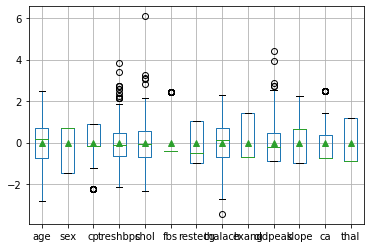

In [18]:
scaled_data.boxplot(column=column_name,
                    showmeans=True)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
#데이터중 30프로를 떼서 나중에 테스트용으로 씀
X_train, X_test, Y_train, Y_test = train_test_split(
    scaled_data, target, test_size=0.30)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('Y_train:', Y_train.shape)
print('Y_test:', Y_test.shape)

X_train: (207, 13)
X_test: (89, 13)
Y_train: (207, 1)
Y_test: (89, 1)


In [26]:
model = Sequential()
model.add(Dense(512, input_dim=13, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#Dropout 은 뭔가 하나씩 빼고 학습하는거, 과민하게 학습하지 않고 유연하게.. 과적합을 줄여줌
#에폭마다 25프로를 weight수정을 하지 않음 (0.25의 경우)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               7168      
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [27]:
#끝까지 test로 빼둔 30은 안씀, train중에서 매 에폭마다 20 따로 떼서 val_accuracy를 따로 계산
#accuracy는 데이터를 분류할때 보는거 , 분류할때 보는거, 값을 예측할때는 정답이랑 얼마나 오차가 있는지 loss를 봐야함
#해당모델은 이진분류라 accuracy를 
model.compile(loss='mse', optimizer='adam',
              metrics=['binary_accuracy'])
fit_hist = model.fit(X_train, Y_train, batch_size=50, epochs=7,
                     validation_split=0.2, verbose=1)  #매 epoch마다 20퍼를 뽑아서 80으로 학습했을때 남은 20퍼를 얼마나 잘 검증하는지

Epoch 1/7
4/4 [==============================] - 1s 70ms/step - loss: 0.2272 - binary_accuracy: 0.6364 - val_loss: 0.1363 - val_binary_accuracy: 0.8810
Epoch 2/7
4/4 [==============================] - 0s 13ms/step - loss: 0.1576 - binary_accuracy: 0.8303 - val_loss: 0.1074 - val_binary_accuracy: 0.8333
Epoch 3/7
4/4 [==============================] - 0s 15ms/step - loss: 0.1156 - binary_accuracy: 0.8727 - val_loss: 0.1004 - val_binary_accuracy: 0.8333
Epoch 4/7
4/4 [==============================] - 0s 13ms/step - loss: 0.1040 - binary_accuracy: 0.8667 - val_loss: 0.1006 - val_binary_accuracy: 0.8333
Epoch 5/7
4/4 [==============================] - 0s 13ms/step - loss: 0.1020 - binary_accuracy: 0.8606 - val_loss: 0.1106 - val_binary_accuracy: 0.8333
Epoch 6/7
4/4 [==============================] - 0s 13ms/step - loss: 0.0985 - binary_accuracy: 0.8788 - val_loss: 0.1217 - val_binary_accuracy: 0.7857
Epoch 7/7
4/4 [==============================] - 0s 14ms/step - loss: 0.0915 - binary_ac

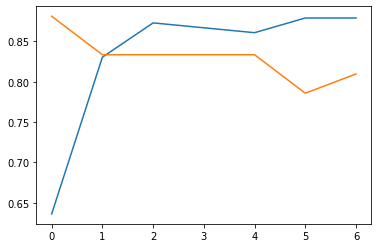

In [28]:
plt.plot(fit_hist.history['binary_accuracy'])
plt.plot(fit_hist.history['val_binary_accuracy'])  #검증정확도

plt.show()

#2에폭쯤부터 과적합이 일어나기 시작함, 답을 외워버린거 새로운 유형의 문제를 보게되면 틀리는

In [29]:
#검증할때 쓰는 evaluate   진행사항 안보려고 verbose=0
score = model.evaluate(X_test, Y_test, verbose=0)  #loss랑 accuracy만 구함 testset에 대한 학습은 하지 않음
print('Keras DNN model loss:', score[0])  #evaluate는 리스트로 값을 반환, 0이 loss, 1이 accuracy
print('Keras DNN model accuracy:', score[1])

Keras DNN model loss: 0.1348746120929718
Keras DNN model accuracy: 0.8426966071128845


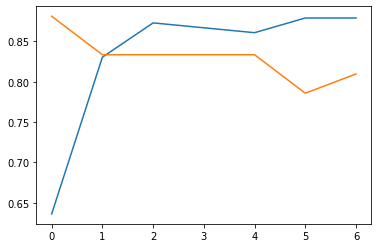

In [30]:
plt.plot(fit_hist.history['binary_accuracy'])
plt.plot(fit_hist.history['val_binary_accuracy'])  #검증정확도

plt.show()

In [31]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('loss',score[0])
print('accuracy',score[1])

loss 0.1348746120929718
accuracy 0.8426966071128845
